In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("OnlineRetail.csv", encoding='latin1')
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [4]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

data['InvoiceYearMonth'] = data['InvoiceDate'].map(lambda date: 100*date.year + date.month)

data['Revenue'] = data['UnitPrice'] * data['Quantity']
tx_revenue = data.groupby(['InvoiceYearMonth'])['Revenue'].sum().reset_index()
tx_revenue

,InvoiceYearMonth,Revenue
0,201012,748957.020
1,201101,560000.260
2,201102,498062.650
3,201103,683267.080
4,201104,493207.121
5,201105,723333.510
6,201106,691123.120
7,201107,681300.111
8,201108,682680.510
9,201109,1019687.622


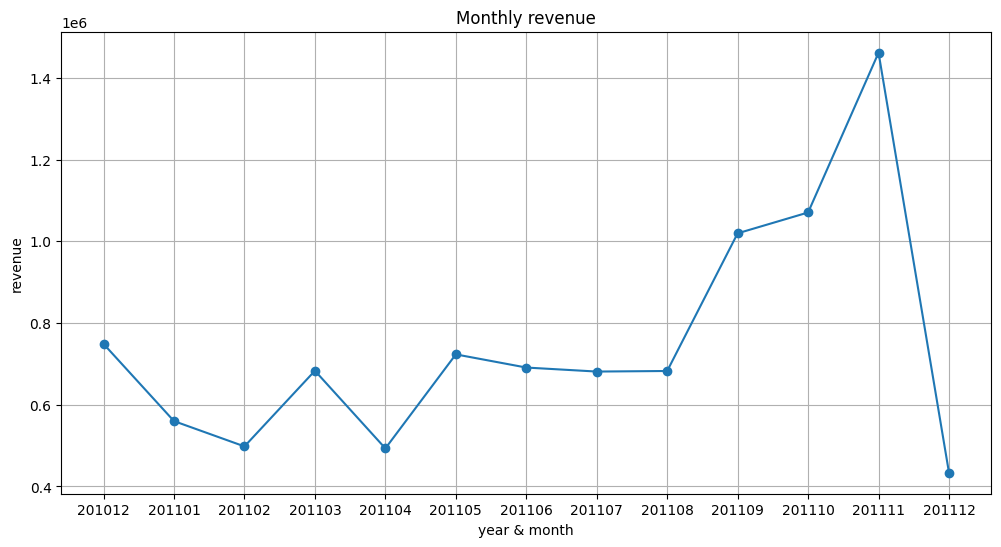

In [5]:
plt.figure(figsize=(12,6))
plt.plot(tx_revenue['InvoiceYearMonth'].to_numpy(dtype=str), tx_revenue['Revenue'], marker='o')
plt.grid()
plt.xlabel("year & month")
plt.ylabel("revenue")
plt.title("Monthly revenue")
plt.savefig("output/1.jpg")
plt.show()

In [6]:
tx_revenue['MonthlyGrowth'] = tx_revenue['Revenue'].pct_change()

tx_revenue.head()

,InvoiceYearMonth,Revenue,MonthlyGrowth
0,201012,748957.020,NaN
1,201101,560000.260,-0.252293
2,201102,498062.650,-0.110603
3,201103,683267.080,0.371850
4,201104,493207.121,-0.278163


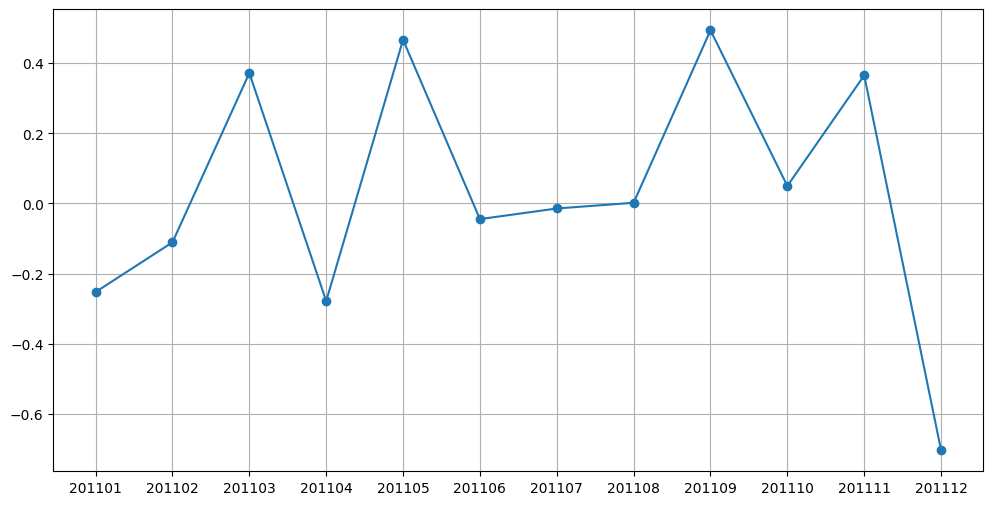

In [7]:
plt.figure(figsize=(12,6))
plt.plot(tx_revenue['InvoiceYearMonth'].to_numpy(dtype=str), tx_revenue['MonthlyGrowth'].to_numpy(), marker='o')
plt.grid()
plt.show()

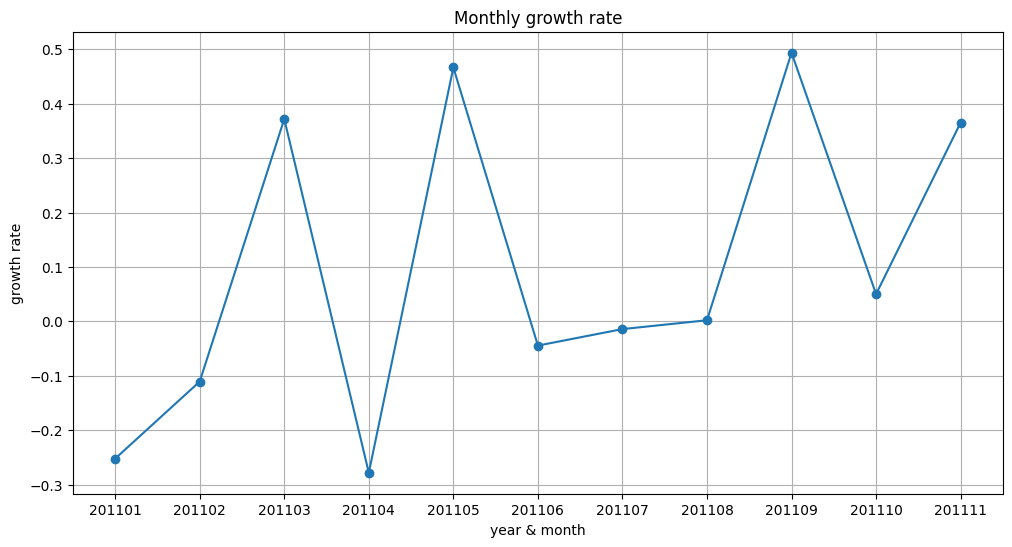

In [8]:
plt.figure(figsize=(12,6))
plt.plot(tx_revenue.query("InvoiceYearMonth < 201112")['InvoiceYearMonth'].to_numpy(dtype=str), 
         tx_revenue.query("InvoiceYearMonth < 201112")['MonthlyGrowth'].to_numpy(), marker='o')
plt.grid()
plt.xlabel("year & month")
plt.ylabel("growth rate")
plt.title("Monthly growth rate")
plt.savefig("output/2.jpg")
plt.show()

In [9]:
tx_uk = data.query("Country=='United Kingdom'").reset_index(drop=True)

tx_monthly_active = tx_uk.groupby('InvoiceYearMonth')['CustomerID'].nunique().reset_index()

tx_monthly_active

,InvoiceYearMonth,CustomerID
0,201012,871
1,201101,684
2,201102,714
3,201103,923
4,201104,817
5,201105,985
6,201106,943
7,201107,899
8,201108,867
9,201109,1177


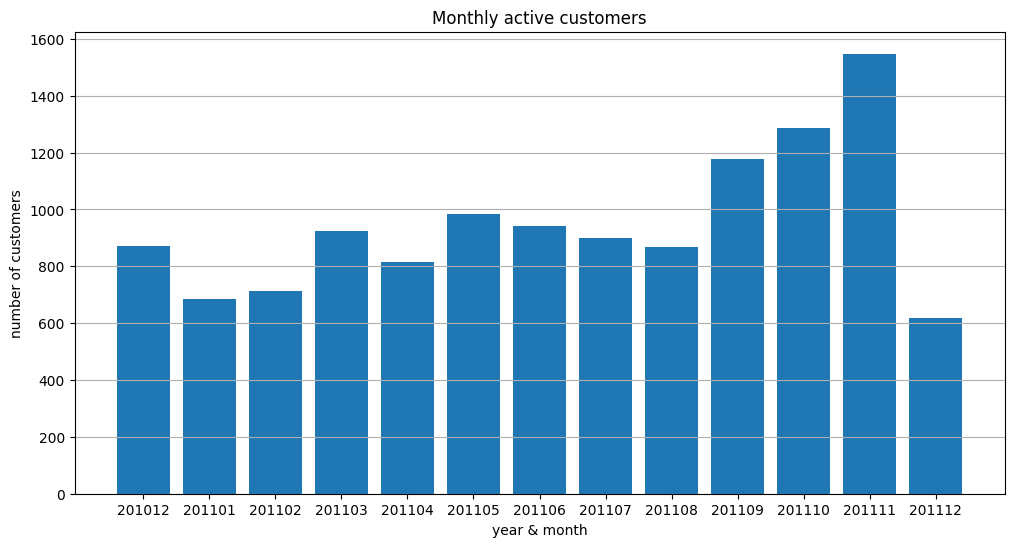

In [10]:
plt.figure(figsize=(12,6))
plt.bar(tx_monthly_active['InvoiceYearMonth'].to_numpy(dtype=str), tx_monthly_active['CustomerID'].to_numpy())
plt.grid(axis='y')
plt.xlabel("year & month")
plt.ylabel("number of customers")
plt.title("Monthly active customers")
plt.savefig("output/3.jpg")
plt.show()

In [11]:
tx_monthly_sales = tx_uk.groupby('InvoiceYearMonth')['Quantity'].sum().reset_index()

tx_monthly_sales

,InvoiceYearMonth,Quantity
0,201012,298101
1,201101,237381
2,201102,225641
3,201103,279843
4,201104,257666
5,201105,306452
6,201106,258522
7,201107,324129
8,201108,319804
9,201109,458490


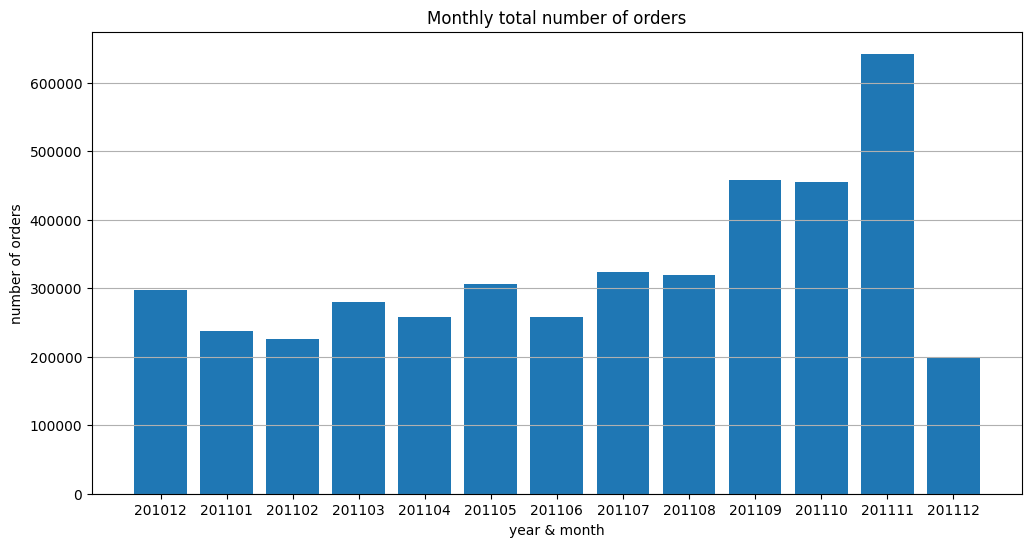

In [12]:
plt.figure(figsize=(12,6))
plt.bar(tx_monthly_sales['InvoiceYearMonth'].to_numpy(dtype=str), tx_monthly_sales['Quantity'].to_numpy())
plt.grid(axis='y')
plt.xlabel("year & month")
plt.ylabel("number of orders")
plt.title("Monthly total number of orders")
plt.savefig("output/4.jpg")
plt.show()

In [13]:
tx_monthly_order_avg = tx_uk.groupby('InvoiceYearMonth')['Revenue'].mean().reset_index()

tx_monthly_order_avg

,InvoiceYearMonth,Revenue
0,201012,16.865860
1,201101,13.614680
2,201102,16.093027
3,201103,16.716166
4,201104,15.773380
5,201105,17.713823
6,201106,16.714748
7,201107,15.723497
8,201108,17.315899
9,201109,18.931723


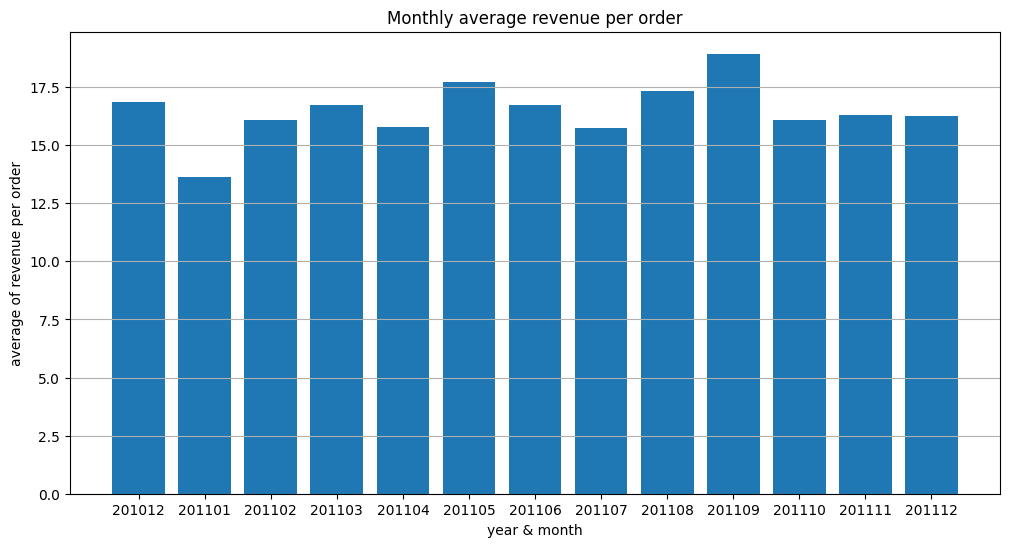

In [14]:
plt.figure(figsize=(12,6))
plt.bar(tx_monthly_order_avg['InvoiceYearMonth'].to_numpy(dtype=str), tx_monthly_order_avg['Revenue'].to_numpy())
plt.grid(axis='y')
plt.xlabel("year & month")
plt.ylabel("average of revenue per order")
plt.title("Monthly average revenue per order")
plt.savefig("output/5.jpg")
plt.show()

In [15]:
tx_min_purchase = tx_uk.groupby('CustomerID').InvoiceDate.min().reset_index()
tx_min_purchase.columns = ['CustomerID','MinPurchaseDate']
tx_min_purchase['MinPurchaseYearMonth'] = tx_min_purchase['MinPurchaseDate'].map(lambda date: 100*date.year + date.month)

tx_uk = pd.merge(tx_uk, tx_min_purchase, on='CustomerID')

tx_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,Revenue,MinPurchaseDate,MinPurchaseYearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,201012,15.30,2010-12-01 08:26:00,201012
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,201012,22.00,2010-12-01 08:26:00,201012
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012


In [16]:
tx_uk['UserType'] = 'New'
tx_uk.loc[tx_uk['InvoiceYearMonth']>tx_uk['MinPurchaseYearMonth'],'UserType'] = 'Existing'

tx_user_type_revenue = tx_uk.groupby(['InvoiceYearMonth','UserType'])['Revenue'].sum().reset_index()

tx_user_type_revenue = tx_user_type_revenue.query("InvoiceYearMonth != 201012 and InvoiceYearMonth != 201112")

tx_user_type_revenue

,InvoiceYearMonth,UserType,Revenue
1,201101,Existing,195275.510
2,201101,New,156705.770
3,201102,Existing,220994.630
4,201102,New,127859.000
5,201103,Existing,296350.030
6,201103,New,160567.840
7,201104,Existing,268226.660
8,201104,New,108517.751
9,201105,Existing,434725.860
10,201105,New,90847.490


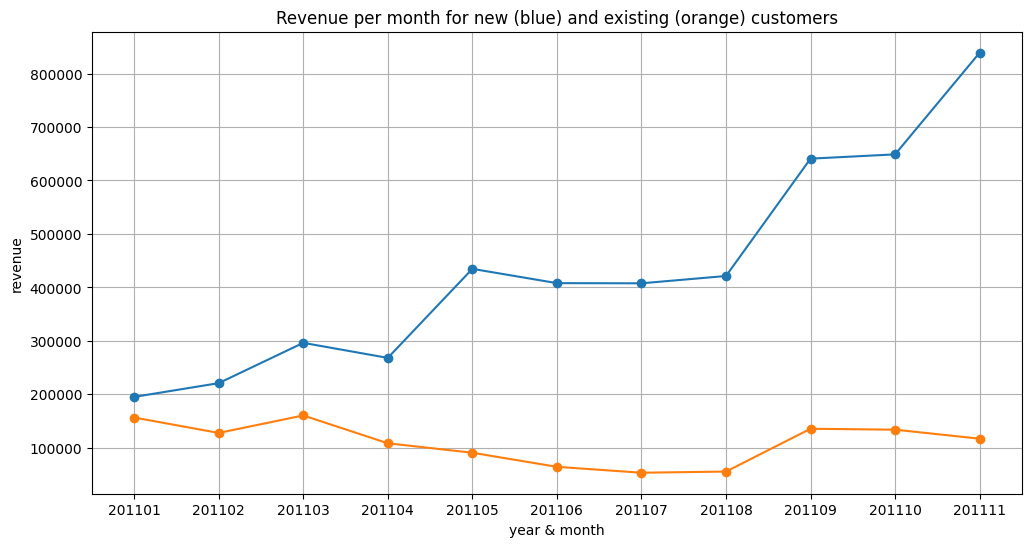

In [17]:
plt.figure(figsize=(12,6))
plt.plot(tx_user_type_revenue.query("UserType == 'Existing'")['InvoiceYearMonth'].to_numpy(dtype=str), 
         tx_user_type_revenue.query("UserType == 'Existing'")['Revenue'].to_numpy(), marker='o')

plt.plot(tx_user_type_revenue.query("UserType == 'New'")['InvoiceYearMonth'].to_numpy(dtype=str), 
         tx_user_type_revenue.query("UserType == 'New'")['Revenue'].to_numpy(), marker='o')

plt.grid()
plt.xlabel("year & month")
plt.ylabel("revenue")
plt.title("Revenue per month for new (blue) and existing (orange) customers")
plt.savefig("output/6.jpg")
plt.show()

In [33]:
tx_user_ratio = tx_uk.query("UserType == 'New'").groupby(['InvoiceYearMonth'])['CustomerID'].nunique()/tx_uk.query("UserType == 'Existing'").groupby(['InvoiceYearMonth'])['CustomerID'].nunique() 
tx_user_ratio = tx_user_ratio.reset_index()
tx_user_ratio = tx_user_ratio.dropna()

tx_user_ratio

,InvoiceYearMonth,CustomerID
1,201101,1.124224
2,201102,0.904000
3,201103,0.792233
4,201104,0.510166
5,201105,0.343793
6,201106,0.281250
7,201107,0.236589
8,201108,0.192572
9,201109,0.304878
10,201110,0.328852


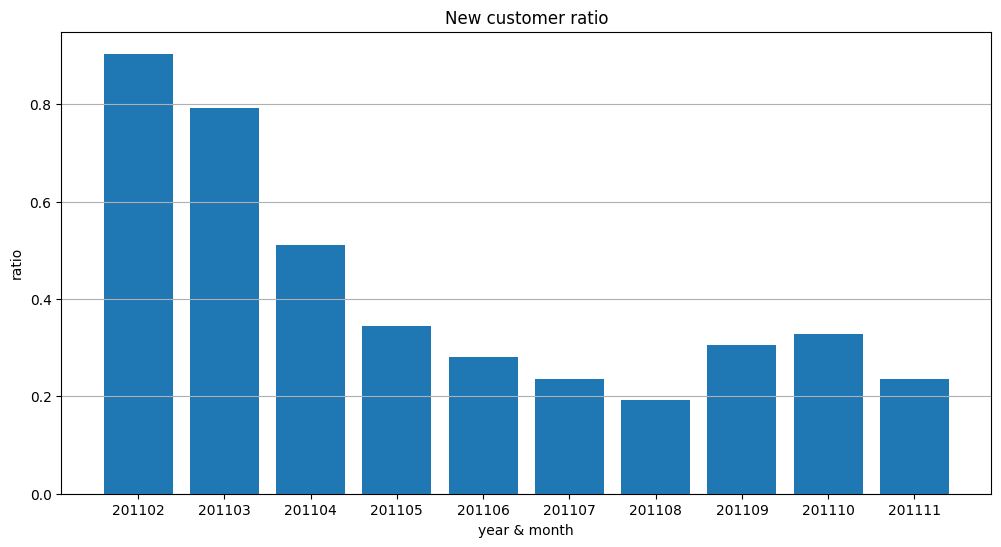

In [21]:
plt.figure(figsize=(12,6))
plt.bar(tx_user_ratio.query("InvoiceYearMonth>201101 and InvoiceYearMonth<201112")['InvoiceYearMonth'].to_numpy(dtype=str), 
        tx_user_ratio.query("InvoiceYearMonth>201101 and InvoiceYearMonth<201112")['CustomerID'].to_numpy())
plt.grid(axis='y')
plt.xlabel("year & month")
plt.ylabel("ratio")
plt.title("New customer ratio")
plt.savefig("output/7.jpg")
plt.show()

In [34]:
tx_user_purchase = tx_uk.groupby(['CustomerID','InvoiceYearMonth'])['Revenue'].sum().reset_index()

tx_retention = pd.crosstab(tx_user_purchase['CustomerID'], tx_user_purchase['InvoiceYearMonth']).reset_index()

tx_retention.head()

InvoiceYearMonth,CustomerID,201012,201101,201102,201103,201104,201105,201106,201107,201108,201109,201110,201111,201112
0,12346.0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,12747.0,1,1,0,1,0,1,1,0,1,0,1,1,1
2,12748.0,1,1,1,1,1,1,1,1,1,1,1,1,1
3,12749.0,0,0,0,0,0,1,0,0,1,0,0,1,1
4,12820.0,0,1,0,0,0,0,0,0,0,1,1,0,1


In [35]:
months = tx_retention.columns[2:]
retention_array = []
for i in range(len(months)-1):
    retention_data = {}
    selected_month = months[i+1]
    prev_month = months[i]
    retention_data['InvoiceYearMonth'] = int(selected_month)
    retention_data['TotalUserCount'] = tx_retention[selected_month].sum()
    retention_data['RetainedUserCount'] = tx_retention[(tx_retention[selected_month]>0) & (tx_retention[prev_month]>0)][selected_month].sum()
    retention_array.append(retention_data)
    
tx_retention = pd.DataFrame(retention_array)
tx_retention['RetentionRate'] = tx_retention['RetainedUserCount']/tx_retention['TotalUserCount']

tx_retention

,InvoiceYearMonth,TotalUserCount,RetainedUserCount,RetentionRate
0,201102,714,263,0.368347
1,201103,923,305,0.330444
2,201104,817,310,0.379437
3,201105,985,369,0.374619
4,201106,943,417,0.442206
5,201107,899,379,0.421580
6,201108,867,391,0.450980
7,201109,1177,417,0.354291
8,201110,1285,502,0.390661
9,201111,1548,616,0.397933


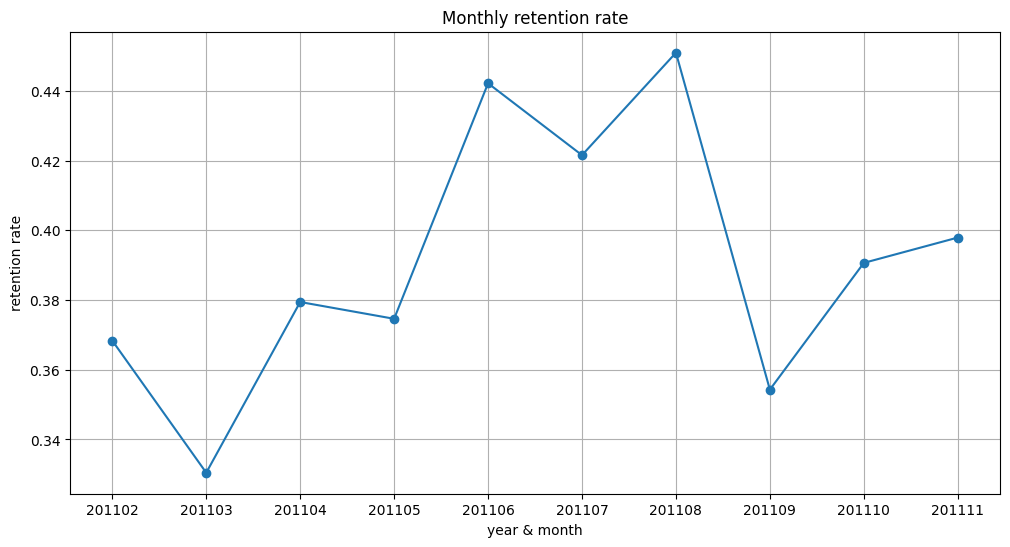

In [24]:
plt.figure(figsize=(12,6))
plt.plot(tx_retention.query("InvoiceYearMonth < 201112")['InvoiceYearMonth'].to_numpy(dtype=str), 
         tx_retention.query("InvoiceYearMonth < 201112")['RetentionRate'].to_numpy(), marker='o')
plt.grid()
plt.xlabel("year & month")
plt.ylabel("retention rate")
plt.title("Monthly retention rate")
plt.savefig("output/8.jpg")
plt.show()

In [36]:

tx_retention = pd.crosstab(tx_user_purchase['CustomerID'], tx_user_purchase['InvoiceYearMonth']).reset_index()
tx_retention = pd.merge(tx_retention,tx_min_purchase[['CustomerID','MinPurchaseYearMonth']],on='CustomerID')
new_column_names = [ 'm_' + str(column) for column in tx_retention.columns[:-1]]
new_column_names.append('MinPurchaseYearMonth')
tx_retention.columns = new_column_names

retention_array = []
for i in range(len(months)):
    retention_data = {}
    selected_month = months[i]
    prev_months = months[:i]
    next_months = months[i+1:]
    for prev_month in prev_months:
        retention_data[prev_month] = np.nan
        
    total_user_count = tx_retention[tx_retention.MinPurchaseYearMonth ==  selected_month].MinPurchaseYearMonth.count()
    retention_data['TotalUserCount'] = total_user_count
    retention_data[selected_month] = 1 
    
    query = "MinPurchaseYearMonth == {}".format(selected_month)
    

    for next_month in next_months:
        new_query = query + " and {} > 0".format(str('m_' + str(next_month)))
        retention_data[next_month] = np.round(tx_retention.query(new_query)['m_' + str(next_month)].sum()/total_user_count,2)
    retention_array.append(retention_data)
    
tx_retention = pd.DataFrame(retention_array)
tx_retention.index = months

tx_retention

,TotalUserCount,201101,201102,201103,201104,201105,201106,201107,201108,201109,201110,201111,201112
InvoiceYearMonth,,,,,,,,,,,,,
201101,362,1.0,0.23,0.28,0.25,0.34,0.29,0.26,0.26,0.31,0.35,0.36,0.15
201102,339,NaN,1.00,0.25,0.19,0.28,0.28,0.25,0.26,0.28,0.28,0.31,0.10
201103,408,NaN,NaN,1.00,0.19,0.26,0.22,0.23,0.17,0.26,0.24,0.29,0.09
201104,276,NaN,NaN,NaN,1.00,0.22,0.22,0.22,0.21,0.23,0.23,0.26,0.08
201105,252,NaN,NaN,NaN,NaN,1.00,0.23,0.17,0.17,0.21,0.24,0.27,0.10
201106,207,NaN,NaN,NaN,NaN,NaN,1.00,0.21,0.16,0.25,0.26,0.32,0.10
201107,172,NaN,NaN,NaN,NaN,NaN,NaN,1.00,0.20,0.19,0.23,0.28,0.11
201108,140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,0.26,0.23,0.26,0.14
201109,275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,0.29,0.33,0.12
